# Figure rendering notebook for Stevens et al. (in prep)

In [1]:
import os, glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

['../processed_data/1_PhysicalUnitsData__UTC_Timing.csv',
 '../processed_data/1_Stitched_LVDT_Data__UTC_Timing.csv',
 '../processed_data/2_Resampled_LVDT_Data.csv',
 '../processed_data/2_Resampled_Pressure_Data.csv',
 '../processed_data/3_Despiked_LVDT_Data.csv',
 '../processed_data/3_Despiked_Pressure_Data.csv',
 '../processed_data/4_Smoothed_LVDT_Data.csv',
 '../processed_data/4_Smoothed_Pressure_Data.csv']

<Axes: xlabel='DateTime'>

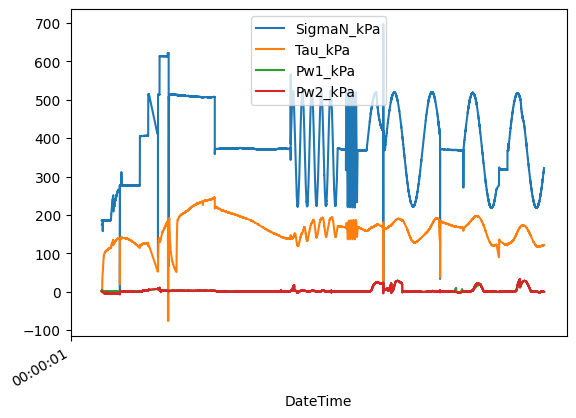

In [4]:
# Figure S1: Signal Procesing Checks
files = glob.glob(os.path.join('..','processed_data','[1-5]_*.csv'))
files.sort()
display(files)

df = pd.read_csv(files[0])
df.index = pd.to_datetime(df.Epoch_UTC)
df.index.name='DateTime'
df.drop(['Epoch_UTC'], axis=1, inplace=True)
dfd = df.iloc[::10,:]
# figS1 = plt.figure()
dfd.plot()


In [19]:
# Figure 2: Load Model parameter space data
path = os.path.join('..','results','model')
df_N = pd.read_csv(os.path.join(path,'SigmaN_kPa_grid.csv'), index_col=[0])
df_U = pd.read_csv(os.path.join(path,'Slip_mpy_grid.csv'), index_col=[0])
df_S = pd.read_csv(os.path.join(path,'S_total_grid.csv'), index_col=[0])
df_T = pd.read_csv(os.path.join(path,'Tau_kPa_grid.csv'), index_col=[0])
# Calculate Drag
df_u = df_T/df_N
df_u[~np.isfinite(df_u.values)] = np.nan

/var/folders/j_/jdy4xlk97nzgs_c2n4nj4ktw0000gn/T/ipykernel_33916/13893118.py:40: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for level in ch.collections:
/var/folders/j_/jdy4xlk97nzgs_c2n4nj4ktw0000gn/T/ipykernel_33916/13893118.py:53: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for level in chm.collections:
/var/folders/j_/jdy4xlk97nzgs_c2n4nj4ktw0000gn/T/ipykernel_33916/13893118.py:66: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for level in chS.collections:


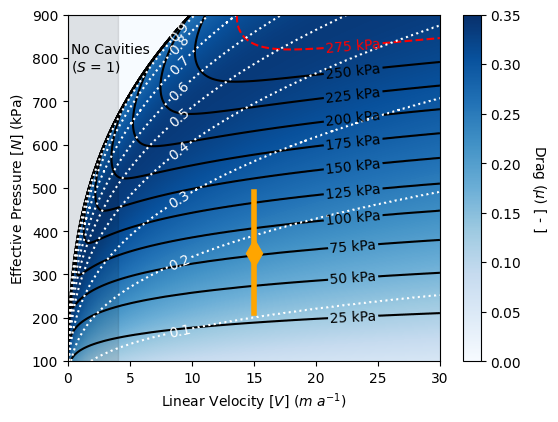

In [35]:
# Figure 2: Generate Figure

dpi = 200
fmt = 'png'

fig = plt.figure(figsize=(6,4.5))
pch = plt.pcolor(df_U.values, df_N.values, df_u.values, cmap='Blues')
plt.colorbar(pch)
plt.text(38,500,'Drag ($\\mu$) [ - ]',rotation=270,fontsize=10,ha='center',va='center')
plt.clim([0,.35])

# Shear stress contours
ch = plt.contour(df_U.values, df_N.values, df_T.values,
				levels=np.arange(25,275,25), colors=['k'])
chm = plt.contour(df_U.values, df_N.values, df_T.values,
				 levels=[275], colors=['r'], linestyles='--')

chS = plt.contour(df_U.values, df_N.values, df_S.values,
				  levels=np.arange(0.1,1,0.1), colors=['w'], linestyles=':')


# Plot operational range for N(t)
plt.plot([15]*2,[210,490],linewidth=4,color='orange',zorder=9,alpha=1)
plt.plot(15,350,'d',color='orange',markersize=14,alpha=1)
## This isn't quite right because the bed is kambered. Leave out for now
# plt.fill_between([7.5,22.5],[210]*2,[490]*2,color='orange',alpha=0.5,zorder=8)
plt.text(0.25,800,'No Cavities\n($S$ = 1)',fontsize=10,va='center')

# Plot V < V_{min} zone
plt.fill_between([0,4],[100]*2,[900]*2,color='black',alpha=0.1)

# Axis Labels
plt.xlabel('Linear Velocity [$V$] ($m$ $a^{-1}$)')
plt.ylabel('Effective Pressure [$N$] (kPa)')
plt.xlim([0, 30])

# Plot shear stress contour labels
mlocs = []; cxloc = 23
# Custom contour label positions
for level in ch.collections:
	path = level.get_paths()
	if len(path) > 0:
		cxpath = path[0].vertices[:,0]
		cypath = path[0].vertices[:,1]
		cxidx = np.argmin(np.abs(cxpath - cxloc))
		cyloc = cypath[cxidx]
		mlocs.append((cxloc,cyloc))
		# mlocs.append((np.mean(level.get_paths()[0].vertices[:,0]),\
		# 	 		  np.mean(level.get_paths()[0].vertices[:,1])))
plt.clabel(ch,inline=True,inline_spacing=2,fontsize=10,fmt='%d kPa',manual=mlocs)

mlocs = []
for level in chm.collections:
	path = level.get_paths()
	if len(path) > 0:
		cxpath = path[0].vertices[:,0]
		cypath = path[0].vertices[:,1]
		cxidx = np.argmin(np.abs(cxpath - cxloc))
		cyloc = cypath[cxidx]
		mlocs.append((cxloc,cyloc))
		# mlocs.append((np.mean(level.get_paths()[0].vertices[:,0]),\
		# 	 		  np.mean(level.get_paths()[0].vertices[:,1])))
plt.clabel(chm,inline=True,inline_spacing=2,fontsize=10,fmt='%d kPa',manual=mlocs)

mlocs = []; cxloc = 9
for level in chS.collections:
	path = level.get_paths()
	if len(path) > 0:
		cxpath = path[0].vertices[:,0]
		cypath = path[0].vertices[:,1]
		cxidx = np.argmin(np.abs(cxpath - cxloc))
		cyloc = cypath[cxidx]
		mlocs.append((cxloc,cyloc))
		# mlocs.append((np.mean(path[0].vertices[:,0]),\
		# 	 		  np.mean(path[0].vertices[:,1])))

plt.clabel(chS,inline=True,inline_spacing=2,fontsize=10,fmt='%.1f',manual=mlocs)

plt.savefig(os.path.join('..','results','figures',f'JGLAC_Fig02_{dpi}DPI.{fmt}'), dpi=dpi, format=fmt)


In [59]:
# Figure 3 Data Import
df = pd.read_csv(os.path.join('..','processed_data','4_Smoothed_Pressure_Data.csv'))
S_N = df['SigmaN_kPa'] - df[['Pw1_kPa', 'Pw2_kPa']].mean(axis=1)
S_N.index = pd.to_datetime(df['Epoch_UTC'], unit='s')
display(S_N)

Epoch_UTC
2021-10-05 19:36:59   NaN
2021-10-05 19:37:00   NaN
2021-10-05 19:37:01   NaN
2021-10-05 19:37:02   NaN
2021-10-05 19:37:03   NaN
                       ..
2021-11-22 17:08:58   NaN
2021-11-22 17:08:59   NaN
2021-11-22 17:09:00   NaN
2021-11-22 17:09:01   NaN
2021-11-22 17:09:02   NaN
Length: 4138324, dtype: float64

Text(0, 0.5, '')

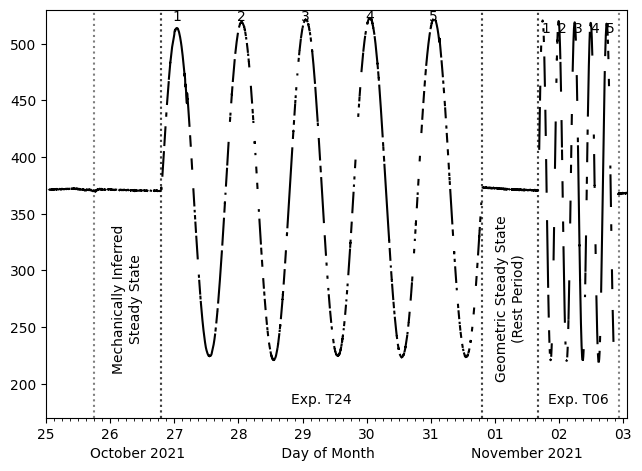

In [60]:
# Figure 3 rendering
dpi = 200
fmt = 'png'
# Labels and intervals
LBV = ['Mechanically Inferred\nSteady State','T24','Geometric Steady State\n(Rest Period)','T06']#,'T96']
TSV = [pd.Timestamp("2021-10-25T18:00:00"),pd.Timestamp('2021-10-26T18:56'),\
	   pd.Timestamp("2021-10-31T19:03"),pd.Timestamp('2021-11-1T16:09:15')]
TEV = [pd.Timestamp("2021-10-26T18:56"),pd.Timestamp("2021-10-31T19:03"),\
	   pd.Timestamp('2021-11-1T16:09:15'),pd.Timestamp("2021-11-02T22:26:30")]

xlims = [pd.Timestamp('2021-10-25'),TEV[-1] + pd.Timedelta(3,unit='hour')]

fig = plt.figure(figsize=(7.5, 5.3))
ax1 = fig.add_subplot(111)
ax1.plot(S_N, 'k-')
ylims = ax1.get_ylim()

# Insert experiment labels
for i_,l_ in enumerate(LBV):
	ax1.plot([TSV[i_],TSV[i_]],ylims,'k:',alpha=0.5)
	ax1.plot([TEV[i_],TEV[i_]],ylims,'k:',alpha=0.5)
	if i_ in [0,2]:
		ax1.text(TSV[i_] + (TEV[i_] - TSV[i_])/2,275,LBV[i_],ha='center',va='center',rotation=90)
	else:
		ax1.text(TSV[i_] + (TEV[i_] - TSV[i_])/2,180,'Exp. {}'.format(LBV[i_]),ha='center', va='bottom')


for i_ in range(5):
	ax1.text(TSV[1] + pd.Timedelta(6,unit='hour') + i_*pd.Timedelta(24,unit='hour'),520,i_+1,ha='center')
	ax1.text(TSV[3] + pd.Timedelta(3,unit='hour') + i_*pd.Timedelta(6,unit='hour'),510,i_ + 1, ha='center')


ax1.set_xlim(xlims)
ax1.set_ylim([170,530])
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=np.arange(0,25,3,dtype=int)))
ax1.format_xdata = mdates.DateFormatter('%d')
ax1.set_xlabel('October 2021                      Day of Month                      November 2021')
ax1.set_ylabel('')